<a href="https://colab.research.google.com/github/sadhanc0419/Netflix_data_investigation/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

About Dataset 

Data Summary

Feature Engineering

Missing Value Analysis

Outlier Analysis

Correlation Analysis

Visualizing Distribution Of Data

Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

Filling 0's In Windspeed Using Random Forest

Linear Regression Model

Regularization Models

Ensemble Models






In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Dataset

In [ ]:
# Importing the dataset
df = pd.read_csv('/content/SeoulBikeData (1).csv', encoding = 'latin1')

# Exploring Data

In [ ]:
df.head().T

,0,1,2,3,4
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [ ]:
  df.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
Date,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rented Bike Count,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Hour,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Temperature(°C),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Humidity(%),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Wind speed (m/s),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Visibility (10m),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dew point temperature(°C),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Solar Radiation (MJ/m2),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rainfall(mm),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe(include='all').T.fillna(' ')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760.0,365,01/12/2017,24,,,,,,,
Rented Bike Count,8760.0,,,,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,,,,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,,,,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,,,,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,,,,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,,,,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,,,,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,,,,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,,,,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
print(f' The given dataset have {df.shape[0]} rows and {df.shape[1]} columns.')

 The given dataset have 8760 rows and 14 columns.


In [ ]:
print('ZZZZZZZZZZZZ')

ZZZZZZZZZZZZ


In [ ]:
df1=df.copy()

In [ ]:
df1.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#column names
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
import datetime
from datetime import datetime

now = datetime.now() 
date_total = now.strftime("%d/%m/%Y %H:%M")
df1['Month'] = now.strftime("%m")
df1['Year']= now.strftime("%Y")

df1['Day'] = now.strftime("%d")



In [ ]:
df1[['Hour']].T

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23


In [ ]:
print(df1['Hour'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


# Data Cleaning

In [ ]:
#Checking duplicate rows
df1.duplicated().value_counts()

False    8760
dtype: int64

There are 0 true values above, therefore there are no dupliacte rows.

In [ ]:
#checking for Null Values
#df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null'})
df1.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
Year                         0
Day                          0
dtype: int64

So there are 0 null values in the data.

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,...,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018
Rented Bike Count,254,204,173,107,78,100,181,460,930,490,...,761,768,837,1047,1384,1003,764,694,712,584
Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.6,-6.5,...,7.8,7.0,7.2,6.0,4.7,4.2,3.4,2.6,2.1,1.9
Humidity(%),37,38,39,40,36,37,35,38,37,27,...,20,20,23,29,34,34,37,39,41,43
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5,...,2.2,3.3,1.5,2.1,1.9,2.6,2.3,0.3,1.0,1.3
Visibility (10m),2000,2000,2000,2000,2000,2000,2000,2000,2000,1928,...,2000,1994,1945,1877,1661,1894,2000,1968,1859,1909
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4,...,-13.8,-14.4,-12.6,-10.7,-9.8,-10.3,-9.9,-9.9,-9.8,-9.3
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.23,...,1.67,1.21,0.72,0.23,0.0,0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'Day'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df1.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Month                           1
Year                            1
Day                             1
dtype: int64

In [ ]:
print(df1['Holiday'].unique(), 
df1['Functioning Day'].unique(),
df1['Seasons'].unique(),
)

['No Holiday' 'Holiday'] ['Yes' 'No'] ['Winter' 'Spring' 'Summer' 'Autumn']


# **Exploratory Data Analysis**

## Univariate Analysis

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

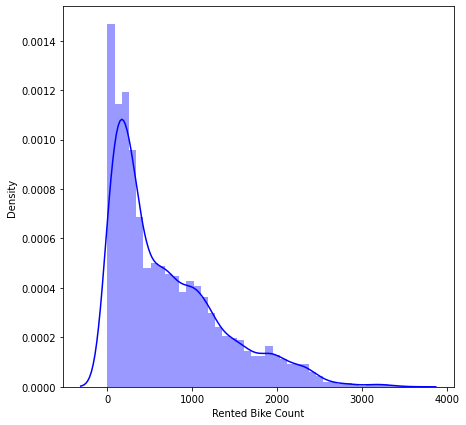

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(df1['Rented Bike Count'],color="b")

In [ ]:
#Checking the no. of 0 in the Rented Bike Count column
len(df1[df1['Rented Bike Count'].map(lambda x: x==0)])

295

In [ ]:
count1 = list(np.log10(df1['Rented Bike Count']).unique())
count1.sort()
print(count1)

[-inf, 0.3010299956639812, 0.47712125471966244, 0.6020599913279624, 0.6989700043360189, 0.7781512503836436, 0.8450980400142568, 0.9030899869919435, 0.9542425094393249, 1.0, 1.041392685158225, 1.0791812460476249, 1.1139433523068367, 1.146128035678238, 1.1760912590556813, 1.2041199826559248, 1.2304489213782739, 1.255272505103306, 1.2787536009528289, 1.3010299956639813, 1.3222192947339193, 1.3424226808222062, 1.3617278360175928, 1.380211241711606, 1.3979400086720377, 1.414973347970818, 1.4313637641589874, 1.4471580313422192, 1.462397997898956, 1.4771212547196624, 1.4913616938342726, 1.505149978319906, 1.5185139398778875, 1.5314789170422551, 1.5440680443502757, 1.5563025007672873, 1.568201724066995, 1.5797835966168101, 1.591064607026499, 1.6020599913279625, 1.6127838567197355, 1.6232492903979006, 1.6334684555795866, 1.6434526764861874, 1.6532125137753437, 1.662757831681574, 1.6720978579357175, 1.6812412373755872, 1.6901960800285136, 1.6989700043360187, 1.7075701760979363, 1.716003343634799

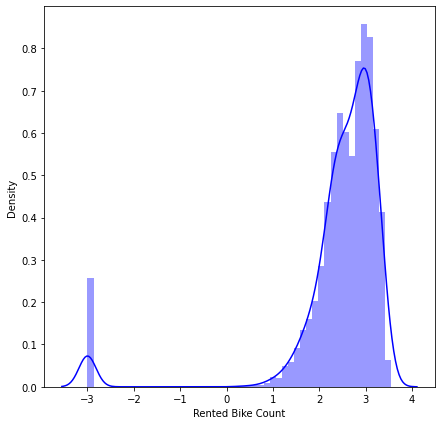

In [ ]:

# Dependent variable 'Rented Bike Count'

plt.figure(figsize=(7,7))
sns.distplot(np.log10(df1['Rented Bike Count']+0.001),color="b")

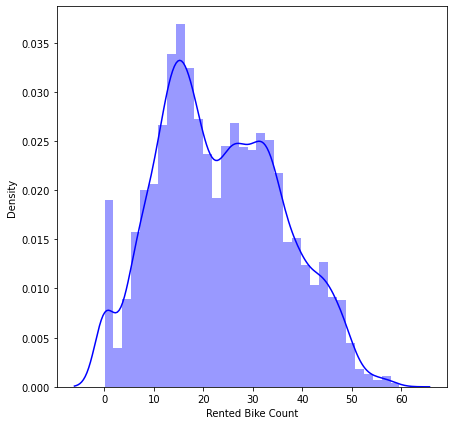

In [ ]:
#Square root transformation of Dependent variable 'Rented Bike Count'

plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df1['Rented Bike Count']+0.001),color="b")

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

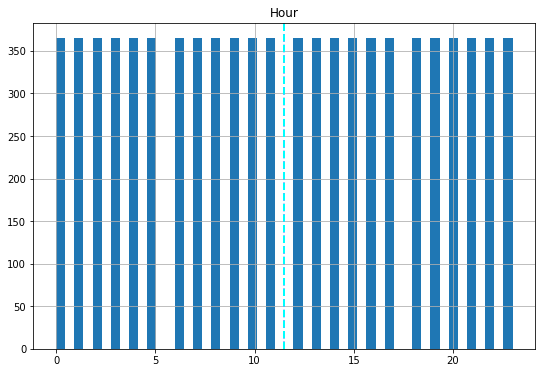

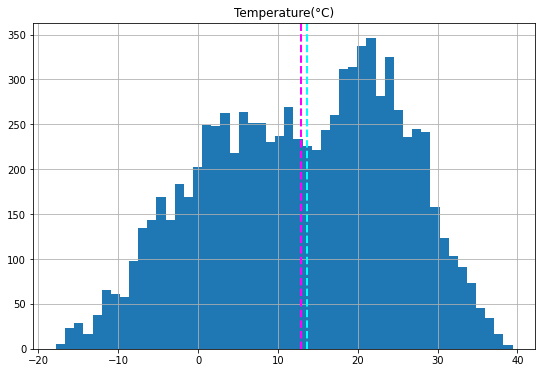

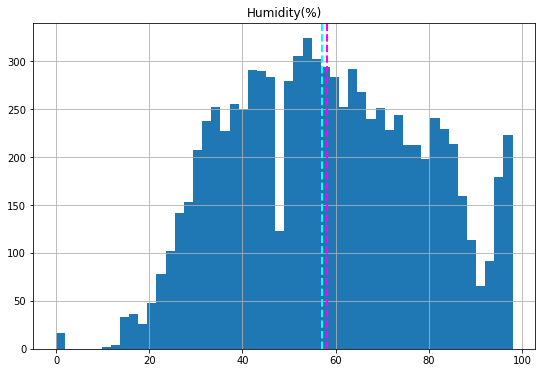

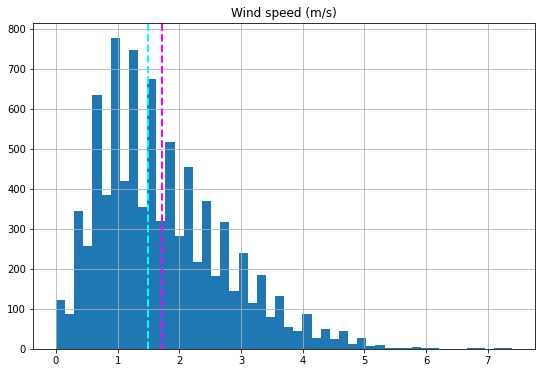

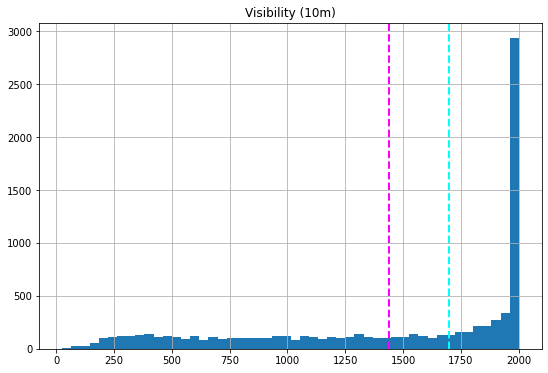

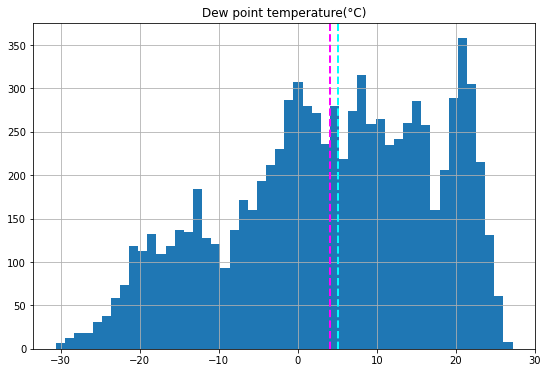

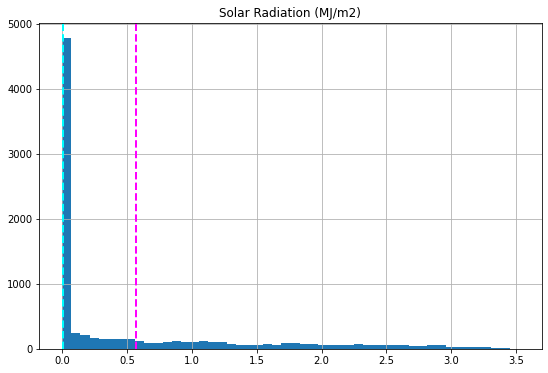

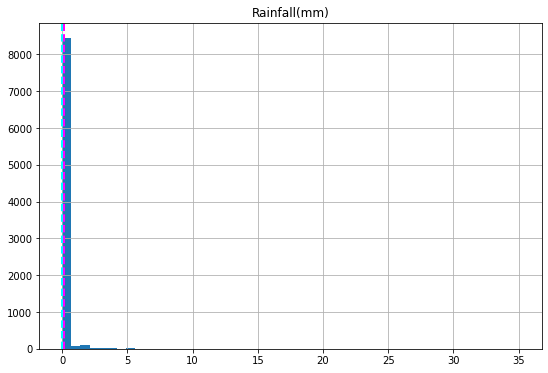

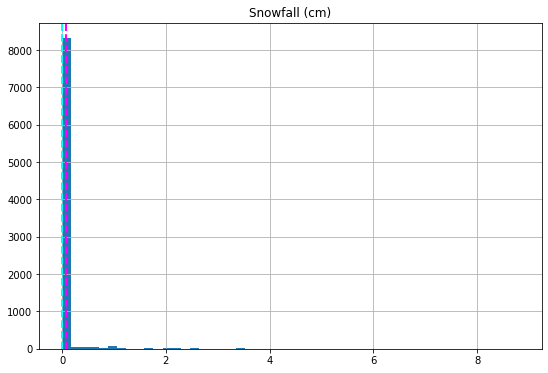

In [ ]:

# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df1[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Bivariate Analysis

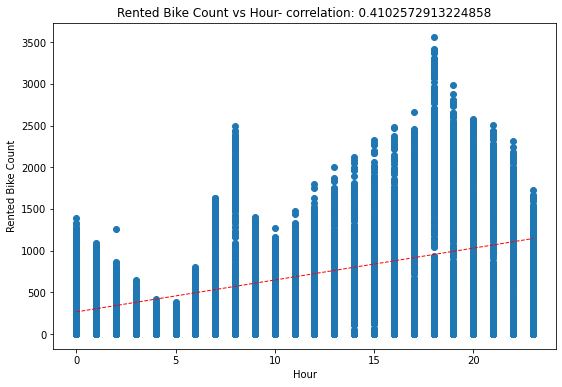

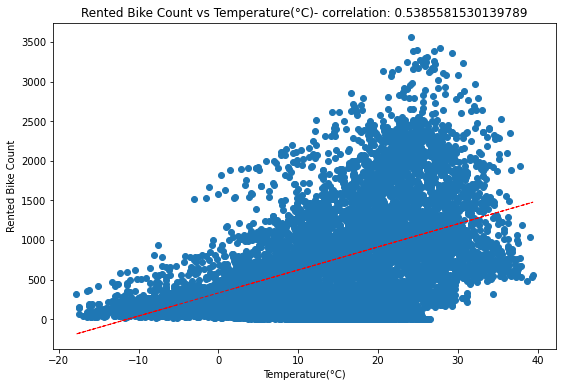

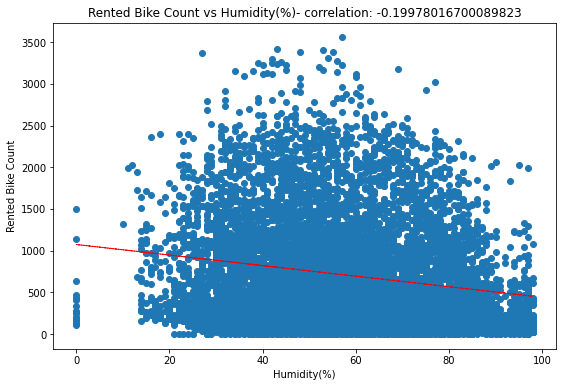

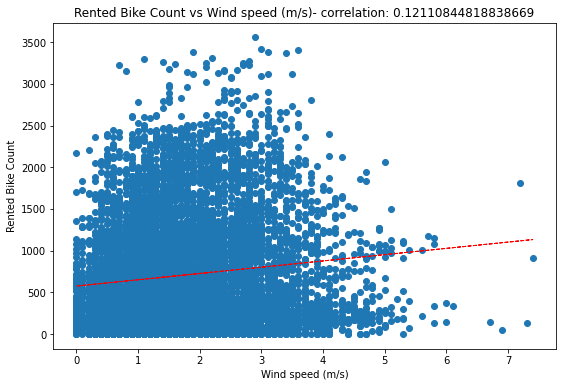

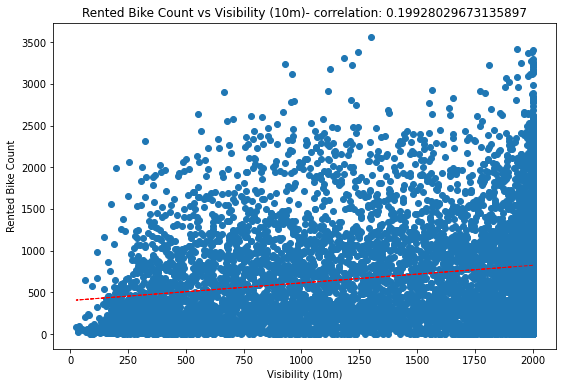

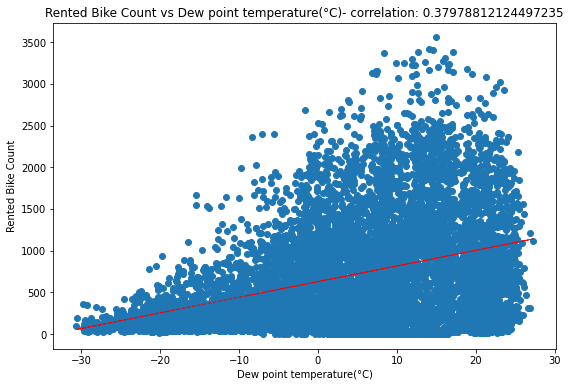

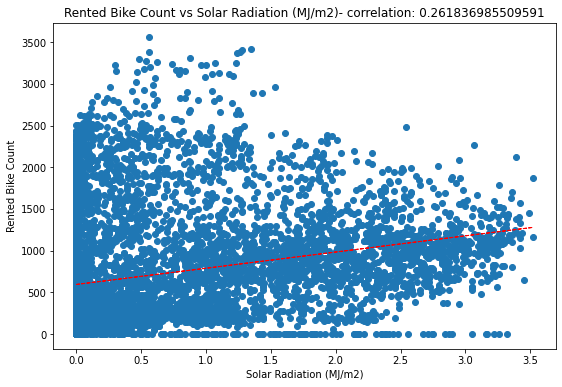

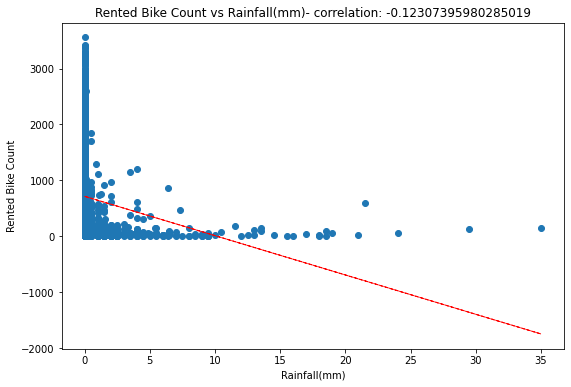

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df1['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df1[col], df1['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df1[col])

    plt.plot(df1[col], y_hat, "r--", lw=1)

plt.show()

Tempratue and hour column are highly corelated to our Target Column

# Multivariate Analysis

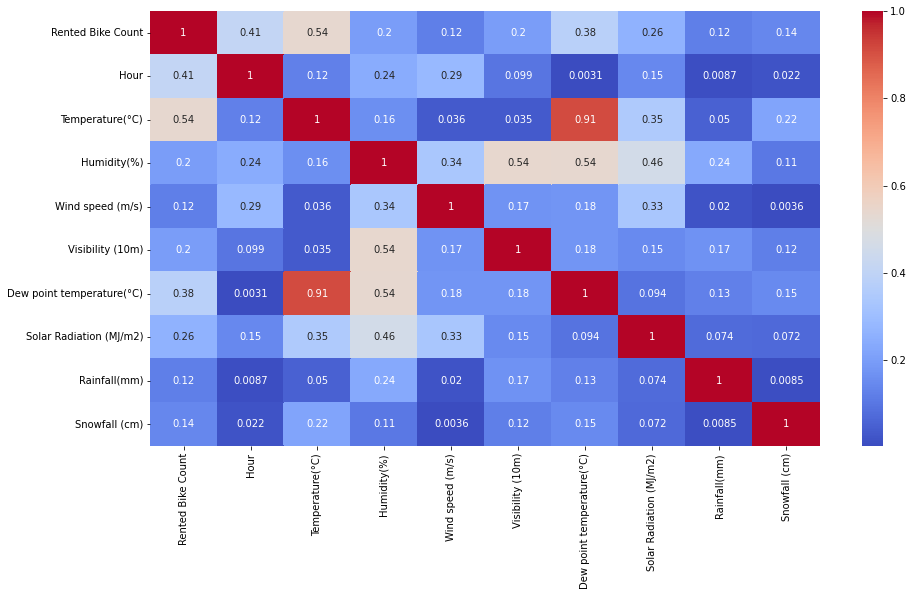

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Temprature and Dew point Temp are highly corelated

TRY1

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'Day'],
      dtype='object')

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Date','Rented Bike Count']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Date','Rented Bike Count', 'Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [ ]:
df1= df1.drop(['Dew point temperature(°C)'],axis=1)

# Categorical Features

We have extracted day date and month from 'Date' column so we can drop the date column

In [ ]:
#Dropping date columns
df1 = df1.drop(['Date'], axis=1)

In [ ]:
categorical_features_info = df1.describe(include=['object','category'])

In [ ]:
categorical_columns =  list(df1.select_dtypes(['object', 'category']))
categorical_features = pd.Index(categorical_columns)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'Month', 'Year', 'Day'], dtype='object')

In [ ]:
categorical_features_info


,Seasons,Holiday,Functioning Day,Month,Year,Day
count,8760,8760,8760,8760,8760,8760
unique,4,2,2,1,1,1
top,Spring,No Holiday,Yes,10,2022,06
freq,2208,8328,8465,8760,8760,8760


In [ ]:
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'Month', 'Year', 'Day'], dtype='object')

In [ ]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
df1_seasons = pd.get_dummies(df['Seasons'])
df1_holiday = pd.get_dummies(df['Holiday'])
df1_functioningday = pd.get_dummies(df['Functioning Day'])

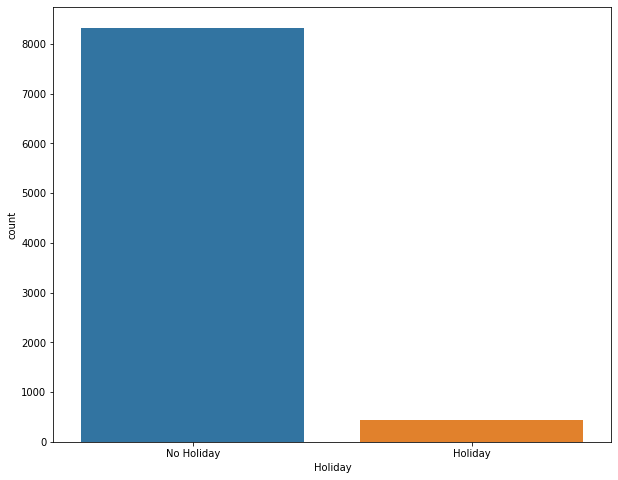

In [ ]:
# Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=df1['Holiday'])

Bike Count according to Holiday

<Figure size 1440x432 with 0 Axes>

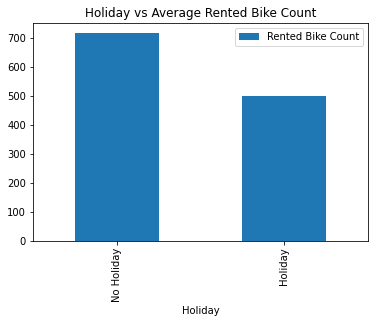

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df1.groupby(['Holiday'])['Rented Bike Count'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Holiday vs Average Rented Bike Count')
plt.show()

More Rented Bikes are Required on the working days

In [ ]:
df1['Month'].unique()

array(['10'], dtype=object)

<Figure size 1440x432 with 0 Axes>

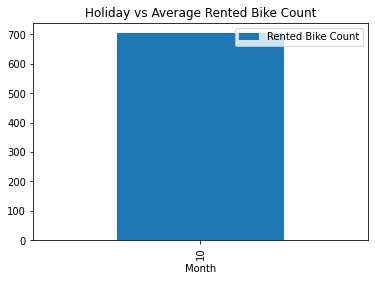

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df1.groupby(['Month'])['Rented Bike Count'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Holiday vs Average Rented Bike Count')
plt.show()

In [ ]:
# group by hotel)
group_by_holiday=df1.groupby('Holiday')['Rented Bike Count'].mean().sort_values(ascending = False)

In [ ]:
df1.columns


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Year', 'Day'],
      dtype='object')

In [ ]:
#Assign the value in X and Y
X = df1.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df1['Rented Bike Count'])

In [ ]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,Day
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,10,2022,06
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,10,2022,06
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,10,2022,06
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,10,2022,06
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,10,2022,06


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 14)
(2190, 14)


In [ ]:
df1.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

# 1. Linear Regression

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

ValueError: ignored